In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.table import Table, vstack,hstack
import numpy.ma as ma
import sys
sys.path.insert(1, '/Users/nityaravi/Documents/Github/RotationCurves/ellipticals')
from elliptical_plottingFunctions import med_err

In [2]:
master_table_fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_StelVelDispDAPMeanSigma_Mvir_smoothness_lt_2_dipole_vflag_comoving_mratio.fits'
master_table = Table.read(master_table_fn)
master_table[:5]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err,dipole_moment,Rgal,vflag_VF,Mstar_HI_R90,Mstar_HI_3p5R90,nsa_elpetro_log_mass,Mstar_Mtot_R90,MstarHI_Mtot_R90,nsa_Mstar_Mtot,rabsmag,param_H2_R90,logHe,Mvis_R90,Mvis_Mtot_R90
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.083

In [3]:
plot_dir = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/Ellipticals_Images/results_plots/'

## Get sample of spirals with cuts

1. vmax > 0
2. m90_disk > 0
3. 10 > v90 > 1000
4. alpha <= 99
5. vmax_err/vmax < 2
6. stellar mass > 9

In [5]:
ellipticals = master_table[master_table['Mvir'] > 0]
spirals = master_table[master_table['v_max'] > 0]
spirals = spirals[spirals['M90_disk'] > 0]
spirals = spirals[spirals['alpha'] <= 99]
spirals = spirals[spirals['v_max_err']/spirals['v_max'] <= 2]
v90 = spirals['v_max'] * spirals['R90_kpc'] / (spirals['r_turn']**spirals['alpha'] + spirals['R90_kpc']**spirals['alpha'])**(1/spirals['alpha'])
all_mass_spirals = spirals[np.logical_and(v90 > 10, v90 < 1000)]
spirals = all_mass_spirals[all_mass_spirals['M90_disk']>9]

## define  void and wall samples

In [18]:
s_void_mask = spirals['vflag_VF'] == 1
e_void_mask = ellipticals['vflag_VF'] == 1
s_wall_mask = spirals['vflag_VF'] == 0
e_wall_mask = ellipticals['vflag_VF'] == 0

s_void = spirals[s_void_mask]
e_void = ellipticals[e_void_mask]
s_wall = spirals[s_wall_mask]
e_wall = ellipticals[e_wall_mask]

## Ellipticals Mstar/Mvir

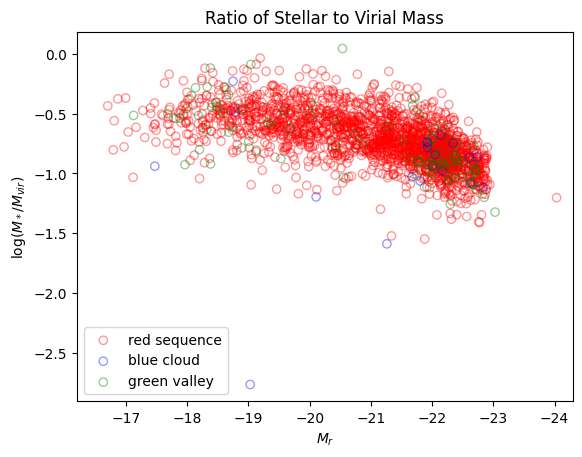

In [6]:
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3], 
            alpha=0.4, color='r', label='red sequence', facecolor='none')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1], 
            alpha=0.4, color='b', label='blue cloud', facecolor='none')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2], 
            alpha=0.4, color='g', label='green valley', facecolor='none')


plt.legend()
plt.xlim(-16.2,-24.3)
plt.xlabel('$M_r$')
plt.title('Ratio of Stellar to Virial Mass')
plt.ylabel(r'$\log(M_*/M_{vir})$')
#plt.savefig(plot_dir + 'Mr_MstarMtot_scatter_cmd_ellipticals.png')
plt.show()

## Ellipticals Mvir

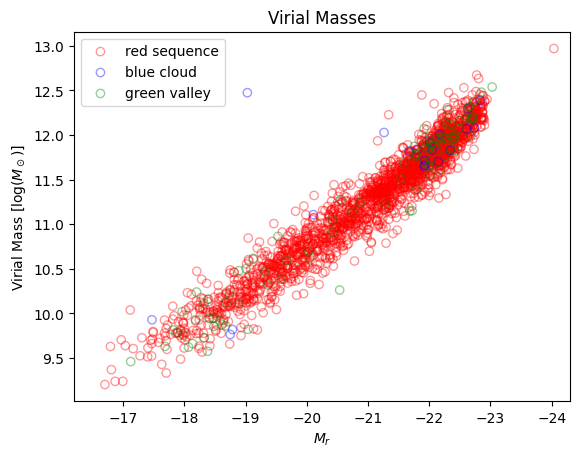

In [8]:
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], ellipticals['Mvir'][ellipticals['CMD_class'] == 3], 
            facecolor='none', color='r', alpha=0.4, label='red sequence')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], ellipticals['Mvir'][ellipticals['CMD_class'] == 1], 
            facecolor='none', color='b', alpha=0.4, label='blue cloud')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], ellipticals['Mvir'][ellipticals['CMD_class'] == 2], 
            facecolor='none', color='g', alpha=0.4, label='green valley')

plt.legend()
plt.xlabel('$M_r$')
plt.ylabel(r'Virial Mass [$\log(M_\odot)$]')
plt.title('Virial Masses')
plt.xlim(-16.2,-24.3)
#plt.savefig(plot_dir + 'Mr_Mtot_scatter_cmd_ellipticals')
plt.show()

## Mtot (R$_{90}$ for spirals); spiral and elliptical

In [15]:
magnitude_bins = np.linspace(np.min([np.min(spirals['rabsmag']), np.min(ellipticals['rabsmag'])]),
                             np.max([np.max(spirals['rabsmag']), np.max(ellipticals['rabsmag'])]),
                             15)
points = (magnitude_bins[1:] + magnitude_bins[:-1])/2

e_vals = []
s_vals = []
for i in range(len(points)):
    mag_lim = magnitude_bins[i+1]
    if i == 0:
        e_vals.append(ellipticals['Mvir'][ellipticals['rabsmag'] <= mag_lim])
        s_vals.append(spirals['M_R90'][spirals['rabsmag'] <= mag_lim])

    else:
        lower_lim = magnitude_bins[i]
        e_vals.append(ellipticals['Mvir'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, ellipticals['rabsmag'] > lower_lim)])
        s_vals.append(spirals['M_R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, spirals['rabsmag'] > lower_lim)])


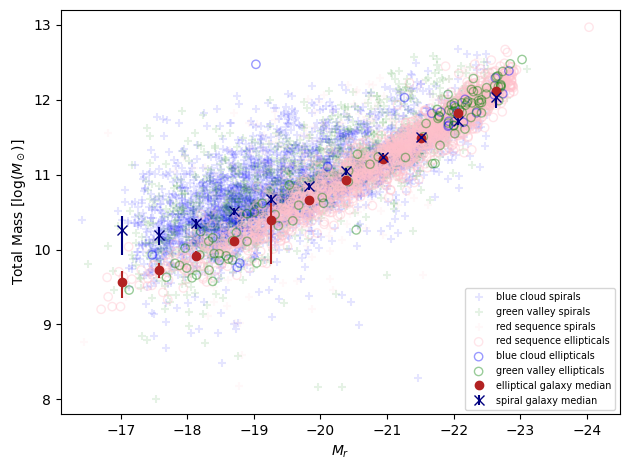

In [17]:
plt.scatter(spirals['rabsmag'] [spirals['CMD_class'] == 1], spirals['M_R90'][spirals['CMD_class'] == 1], 
            color='blue', alpha=0.1, marker='+', label='blue cloud spirals')
plt.scatter(spirals['rabsmag'] [spirals['CMD_class'] == 2], spirals['M_R90'][spirals['CMD_class'] == 2], 
            color='g', alpha=0.1,marker='+', label='green valley spirals')
plt.scatter(spirals['rabsmag'] [spirals['CMD_class'] == 3], spirals['M_R90'][spirals['CMD_class'] == 3], 
            color='pink', alpha=0.1,marker='+', label='red sequence spirals')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], ellipticals['Mvir'][ellipticals['CMD_class'] == 3], 
            color='pink', alpha=0.4, label='red sequence ellipticals', facecolor='none')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], ellipticals['Mvir'][ellipticals['CMD_class'] == 1], 
            color='b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], ellipticals['Mvir'][ellipticals['CMD_class'] == 2], 
            color='g', alpha=0.4, label='green valley ellipticals', facecolor='none')

ep = med_err(e_vals)
sp = med_err(s_vals)

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none')
plt.errorbar(points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7)
plt.errorbar(points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')




plt.legend(fontsize='x-small')
plt.xlabel('$M_r$')
plt.ylabel(r'Total Mass [$\log(M_\odot)$]')
plt.tight_layout()
plt.xlim(-16.1, -24.5)
plt.ylim(7.8,13.2)
#plt.savefig(plot_dir + 'Mr_Mtot_scatter_cmd_morph.png')
plt.show()

## Mtot (R$_{90}$ for spirals); spiral/elliptical void/wall

In [20]:
s_void_vals = []
e_void_vals = []
s_wall_vals = []
e_wall_vals = []


for i in range(len(points)):
    mag_lim = magnitude_bins[i+1]
    if i == 0:
        s_void_vals.append(s_void['M_R90'][s_void['rabsmag'] <= mag_lim])
        e_void_vals.append(e_void['Mvir'][e_void['rabsmag'] <= mag_lim])
        s_wall_vals.append(s_wall['M_R90'][s_wall['rabsmag'] <= mag_lim])
        e_wall_vals.append(e_wall['Mvir'][e_wall['rabsmag'] <= mag_lim])
    else:
        lower_lim = magnitude_bins[i]

        s_void_vals.append(s_void['M_R90'][np.logical_and(s_void['rabsmag'] <= mag_lim, s_void['rabsmag'] > lower_lim)])
        e_void_vals.append(e_void['Mvir'][np.logical_and(e_void['rabsmag'] <= mag_lim, e_void['rabsmag'] > lower_lim)])
        s_wall_vals.append(s_wall['M_R90'][np.logical_and(s_wall['rabsmag'] <= mag_lim, s_wall['rabsmag'] > lower_lim)])
        e_wall_vals.append(e_wall['Mvir'][np.logical_and(e_wall['rabsmag'] <= mag_lim, e_wall['rabsmag'] > lower_lim)])


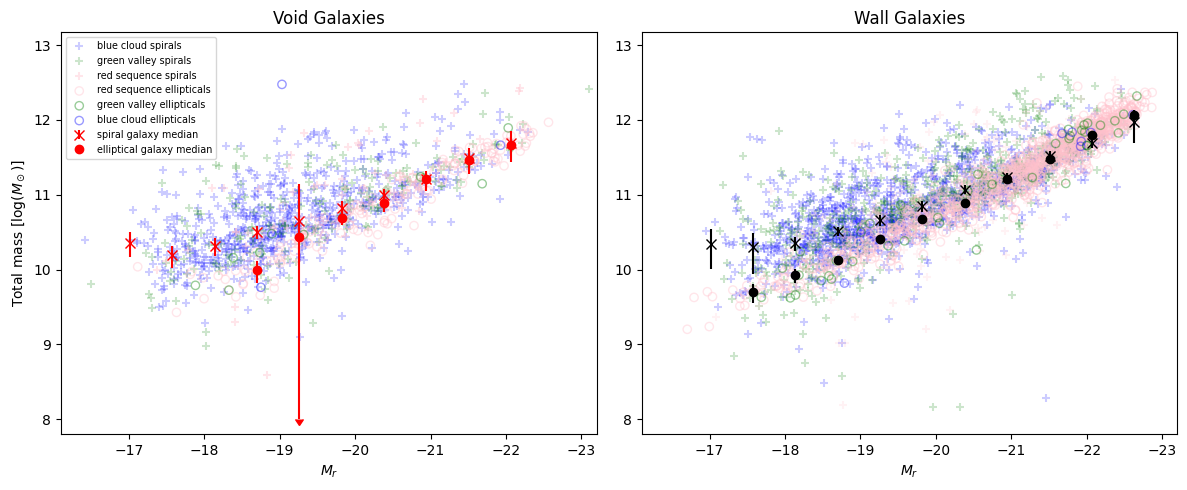

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')

ax[0].set_xlim(-16.1,-23.2)
ax[1].set_xlim(-16.1,-23.2)


ax[0].set_ylabel(r'Total mass [$\log(M_\odot)$]')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(ellipticals['Mvir'])+0.2)
ax[1].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(ellipticals['Mvir'])+0.2)


#void data
ax[0].scatter(s_void['rabsmag'][s_void['CMD_class'] == 1],s_void[s_void['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+', label='blue cloud spirals')
ax[0].scatter(s_void['rabsmag'][s_void['CMD_class'] == 2],s_void[s_void['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void['rabsmag'][s_void['CMD_class'] == 3],s_void[s_void['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void['rabsmag'][e_void['CMD_class'] == 3],e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void['rabsmag'][e_void['CMD_class'] == 2],e_void[e_void['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void['rabsmag'][e_void['CMD_class'] == 1],e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')

#wall data
ax[1].scatter(s_wall['rabsmag'][s_wall['CMD_class'] == 1],s_wall[s_wall['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_wall['rabsmag'][s_wall['CMD_class'] == 2],s_wall[s_wall['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_wall['rabsmag'][s_wall['CMD_class'] == 3],s_wall[s_wall['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.2, marker='+')

ax[1].scatter(e_wall['rabsmag'][e_wall['CMD_class'] == 3],e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(e_wall['rabsmag'][e_wall['CMD_class'] == 2],e_wall[e_wall['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(e_wall['rabsmag'][e_wall['CMD_class'] == 1],e_wall[e_wall['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')


sp_void = med_err(s_void_vals)
sp_wall = med_err(s_wall_vals)
ep_void = med_err(e_void_vals)
ep_wall = med_err(e_wall_vals)

inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
ax[0].errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
ax[0].errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void == np.inf)[0]
sp_wall[inf_bars][:,0]
ax[1].errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-8, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
ax[1].errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-8, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')

fig.tight_layout()
#fig.savefig(plot_dir + 'Mr_Mtot_scatter_cmd_morph_env.png', )


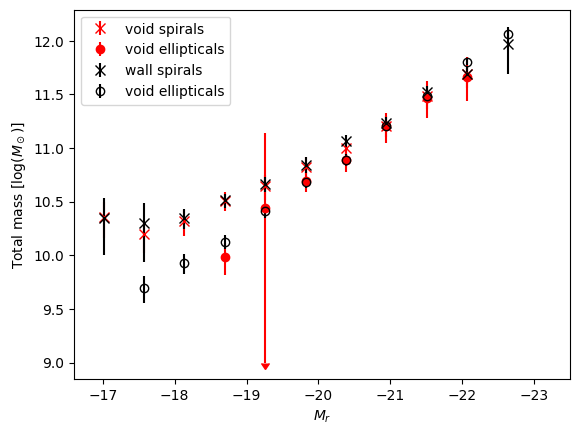

In [24]:
inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
plt.errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
plt.errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',)
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(sp_void == np.inf)[0]
sp_wall[inf_bars][:,0]
plt.errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
plt.errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',mfc='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')


#plt.title('Median total mass')
plt.xlabel('$M_r$')
plt.ylabel(r'Total mass [$\log(M_\odot)$]')
#plt.yscale('log')
plt.legend()
plt.xlim((-16.6,-23.5))
#plt.savefig(plot_dir + 'Mr_Mtot_median_morph_env.png')

plt.show()

## Mtot (within R$_{90}$); void/wall

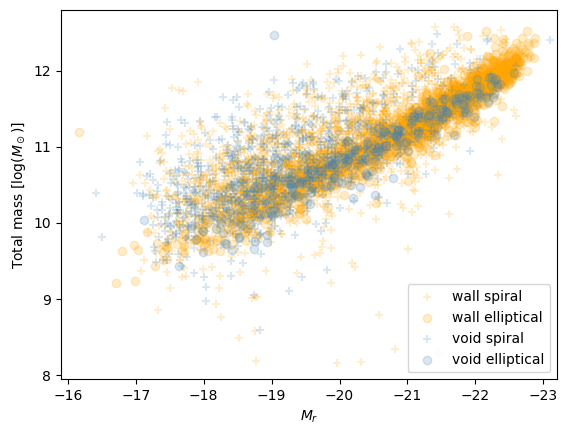

In [26]:
plt.scatter(s_wall['rabsmag'],s_wall['M_R90'], color='orange', alpha=0.2, marker='+', label='wall spiral')
plt.scatter(e_wall['rabsmag'],e_wall['Mvir'], color='orange', alpha=0.2, marker='o', label='wall elliptical')
plt.scatter(s_void['rabsmag'],s_void['M_R90'], color='steelblue', alpha=0.2, marker='+', label='void spiral')
plt.scatter(e_void['rabsmag'],e_void['Mvir'], color='steelblue', alpha=0.2, marker='o', label='void elliptical')
plt.xlim(-15.9, -23.2)
plt.xlabel('$M_r$')
plt.ylabel(r'Total mass [$\log(M_\odot)$]')
plt.legend()
# plt.savefig(plot_dir + 'Mr_Mtot_scatter.png')
plt.show()

## Mtot (3.5R$_{90}$ for spirals); spiral/ellipticals void/wall

In [27]:
s_void_3p5_vals = []
e_void_3p5_vals = []
s_wall_3p5_vals = []
e_wall_3p5_vals = []

for i in range(len(points)):
    mag_lim = magnitude_bins[i+1]
    if i == 0:
        s_void_3p5_vals.append(s_void['M'][s_void['rabsmag'] <= mag_lim])
        e_void_3p5_vals.append(e_void['Mvir'][e_void['rabsmag'] <= mag_lim])
        s_wall_3p5_vals.append(s_wall['M'][s_wall['rabsmag'] <= mag_lim])
        e_wall_3p5_vals.append(e_wall['Mvir'][e_wall['rabsmag'] <= mag_lim])
    else:
        lower_lim = magnitude_bins[i]

        s_void_3p5_vals.append(s_void['M'][np.logical_and(s_void['rabsmag'] <= mag_lim, s_void['rabsmag'] > lower_lim)])
        e_void_3p5_vals.append(e_void['Mvir'][np.logical_and(e_void['rabsmag'] <= mag_lim, e_void['rabsmag'] > lower_lim)])
        s_wall_3p5_vals.append(s_wall['M'][np.logical_and(s_wall['rabsmag'] <= mag_lim, s_wall['rabsmag'] > lower_lim)])
        e_wall_3p5_vals.append(e_wall['Mvir'][np.logical_and(e_wall['rabsmag'] <= mag_lim, e_wall['rabsmag'] > lower_lim)])

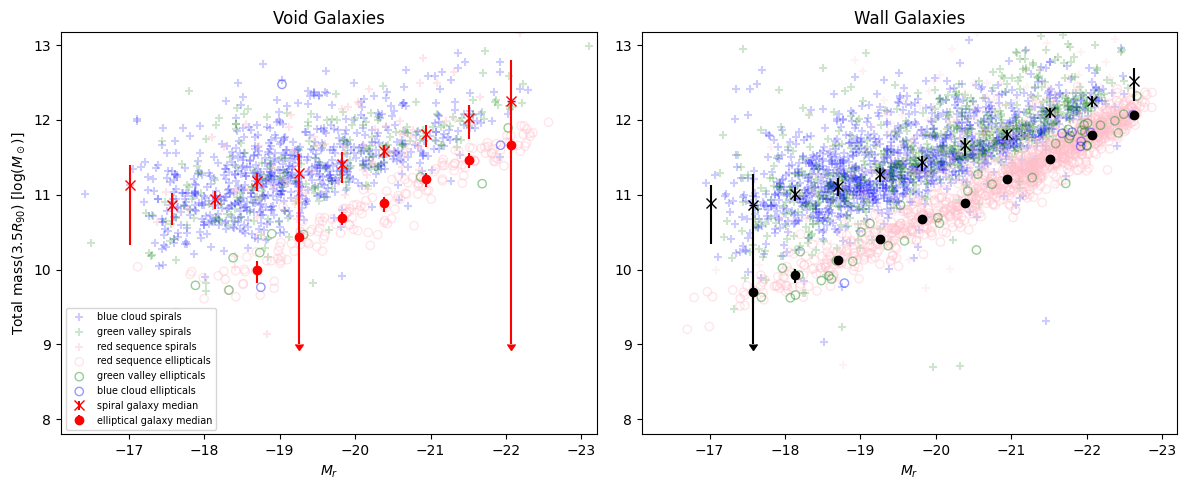

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')
ax[0].set_xlim(-16.1,-23.2)
ax[1].set_xlim(-16.1,-23.2)


ax[0].set_ylabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(ellipticals['Mvir'])+0.2)
ax[1].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(ellipticals['Mvir'])+0.2)


#void data
ax[0].scatter(s_void['rabsmag'][s_void['CMD_class'] == 1],s_void[s_void['CMD_class'] == 1]['M'],
              color='b', alpha=0.2, marker='+', label='blue cloud spirals')
ax[0].scatter(s_void['rabsmag'][s_void['CMD_class'] == 2],s_void[s_void['CMD_class'] == 2]['M'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void['rabsmag'][s_void['CMD_class'] == 3],s_void[s_void['CMD_class'] == 3]['M'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void['rabsmag'][e_void['CMD_class'] == 3],e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void['rabsmag'][e_void['CMD_class'] == 2],e_void[e_void['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void['rabsmag'][e_void['CMD_class'] == 1],e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')

#wall data
ax[1].scatter(s_wall['rabsmag'][s_wall['CMD_class'] == 1],s_wall[s_wall['CMD_class'] == 1]['M'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_wall['rabsmag'][s_wall['CMD_class'] == 2],s_wall[s_wall['CMD_class'] == 2]['M'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_wall['rabsmag'][s_wall['CMD_class'] == 3],s_wall[s_wall['CMD_class'] == 3]['M'],
              color='pink', alpha=0.2, marker='+')

ax[1].scatter(e_wall['rabsmag'][e_wall['CMD_class'] == 3],e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(e_wall['rabsmag'][e_wall['CMD_class'] == 2],e_wall[e_wall['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(e_wall['rabsmag'][e_wall['CMD_class'] == 1],e_wall[e_wall['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')



sp_void = med_err(s_void_3p5_vals)
sp_wall = med_err(s_wall_3p5_vals)
ep_void = med_err(e_void_3p5_vals)
ep_wall = med_err(e_wall_3p5_vals)

inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
ax[0].errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
ax[0].errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall == np.inf)[0]
sp_wall[inf_bars][:,0]
ax[1].errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
ax[1].errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')

fig.tight_layout()
#fig.savefig(plot_dir + 'Mr_Mtot3p5_scatter_cmd_morph_env.png', )


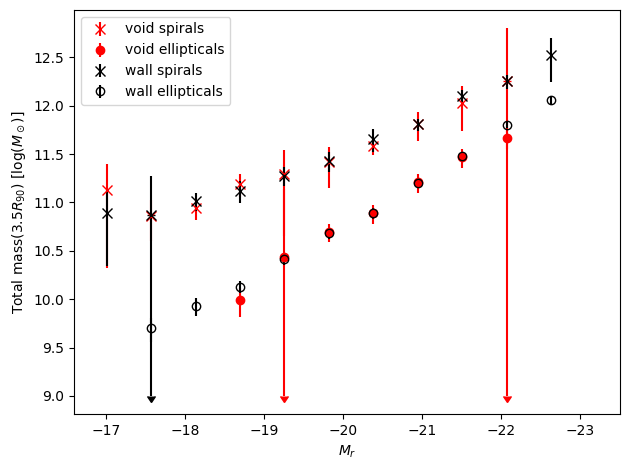

In [31]:
inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
plt.errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
plt.errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',)
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall == np.inf)[0]
sp_wall[inf_bars][:,0]
plt.errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
plt.errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none',mfc='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
plt.legend()
plt.xlim(-16.6,-23.5)

plt.tight_layout()
#plt.savefig(plot_dir + 'Mr_Mtot3p5_median_morph_env.png', )

## Mstar/Mtot(R$_{90}$ for spirals) spirals/ellipticals

In [34]:
spirals_mratiocut = spirals[spirals['Mstar_Mtot_R90'] <= 1.2]
mag_bins = np.linspace(np.min([np.min(ellipticals['rabsmag']), np.min(spirals['rabsmag'])]),
                       np.max([np.max(ellipticals['rabsmag']), np.max(spirals['rabsmag'])]),
                       30)
pts = (mag_bins[1:] + mag_bins[:-1]) / 2
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**spirals_mratiocut['Mstar_Mtot_R90'][spirals_mratiocut['rabsmag'] <= mag_lim])

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**spirals_mratiocut['Mstar_Mtot_R90'][np.logical_and(spirals_mratiocut['rabsmag'] <= mag_lim, 
                                                                         spirals_mratiocut['rabsmag'] > lower_lim)])


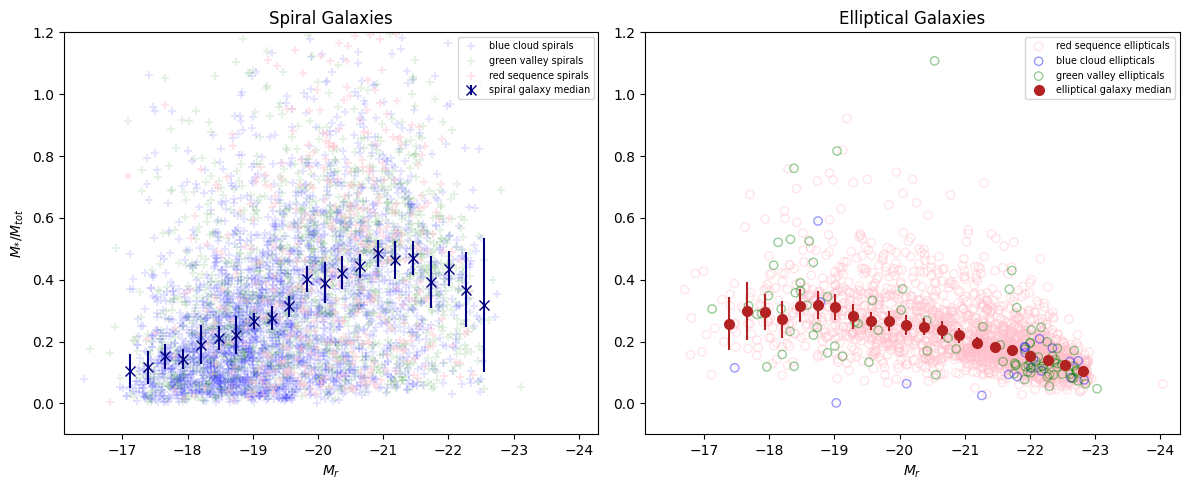

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{*}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals_mratiocut['rabsmag'][spirals_mratiocut['CMD_class'] == 1], 10**spirals_mratiocut['Mstar_Mtot_R90'][spirals_mratiocut['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals_mratiocut['rabsmag'][spirals_mratiocut['CMD_class'] == 2], 10**spirals_mratiocut['Mstar_Mtot_R90'][spirals_mratiocut['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals_mratiocut['rabsmag'][spirals_mratiocut['CMD_class'] == 3], 10**spirals_mratiocut['Mstar_Mtot_R90'][spirals_mratiocut['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')


# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
#fig.savefig(plot_dir + 'Mr_MstarMtot_scatter_cmd_spiral_elliptical.png')

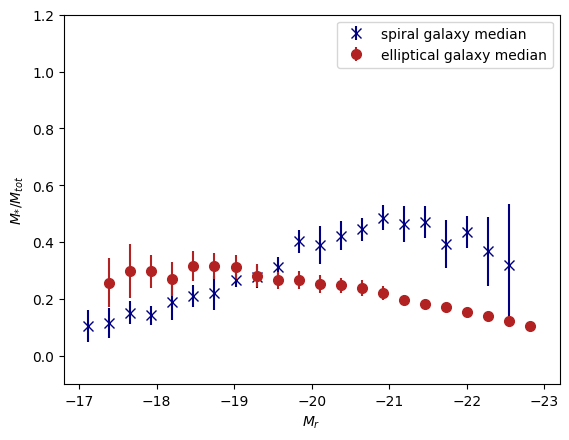

In [36]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{*}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
#plt.savefig(plot_dir + 'Mr_MstarMtot_median_morph.png')
plt.show()

## Mvis(Stellar + HI within R$_{90}$)/Mtot; spiral/ellipticals

In [37]:
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**spirals['MstarHI_Mtot_R90'][spirals['rabsmag'] <= mag_lim])

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**spirals['MstarHI_Mtot_R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)])


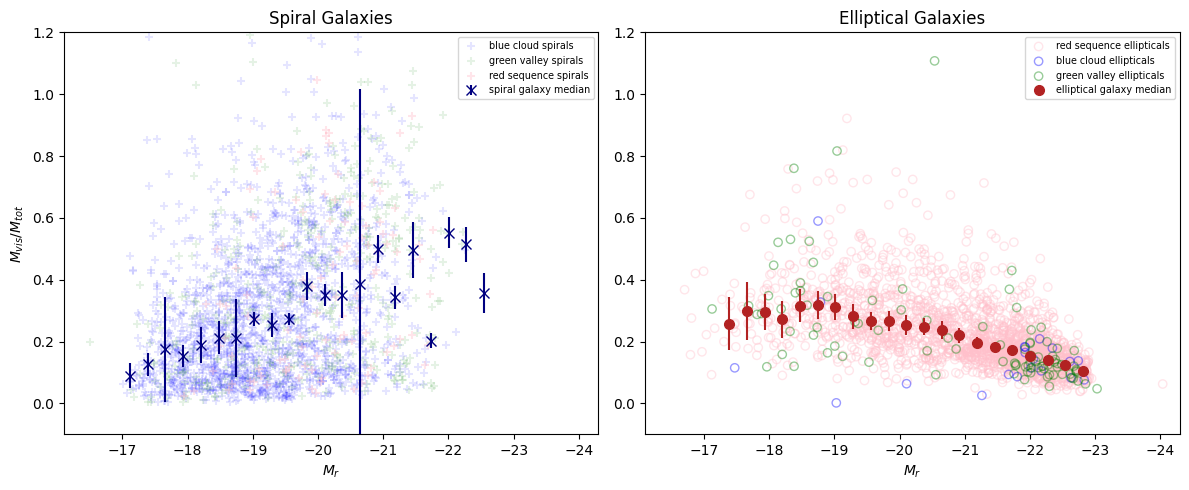

In [38]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 1], 10**spirals['MstarHI_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 2], 10**spirals['MstarHI_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 3], 10**spirals['MstarHI_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
#fig.savefig(plot_dir + 'Mr_MstarHIMtot_scatter_cmd_spiral_elliptical.png')

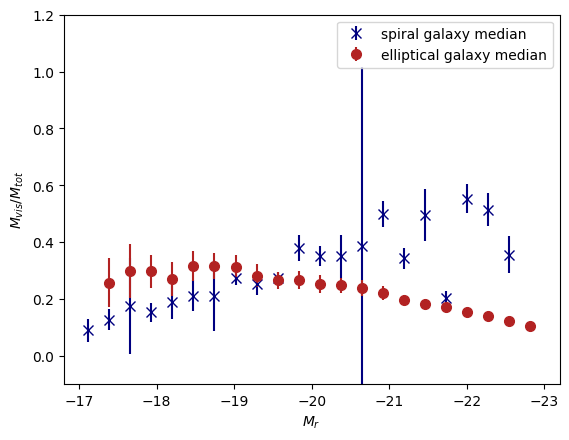

In [39]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
#plt.savefig(plot_dir + 'Mr_MstarHIMtot_median_morph.png')
plt.show()

## Mvis(all within R$_{90}$) spiral/elliptical

In [40]:
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][spirals['rabsmag'] <= mag_lim])

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)])


/Users/nityaravi/Documents/Github/RotationCurves/ellipticals/elliptical_plottingFunctions.py:478: UserWarning: Warning: converting a masked element to nan.
  p[i][0] = median
/Users/nityaravi/Documents/Github/RotationCurves/ellipticals/elliptical_plottingFunctions.py:479: UserWarning: Warning: converting a masked element to nan.
  p[i][1] = rms/sqrtN
/Users/nityaravi/Documents/Github/RotationCurves/ellipticals/elliptical_plottingFunctions.py:480: UserWarning: Warning: converting a masked element to nan.
  p[i][2] = rms/sqrtN


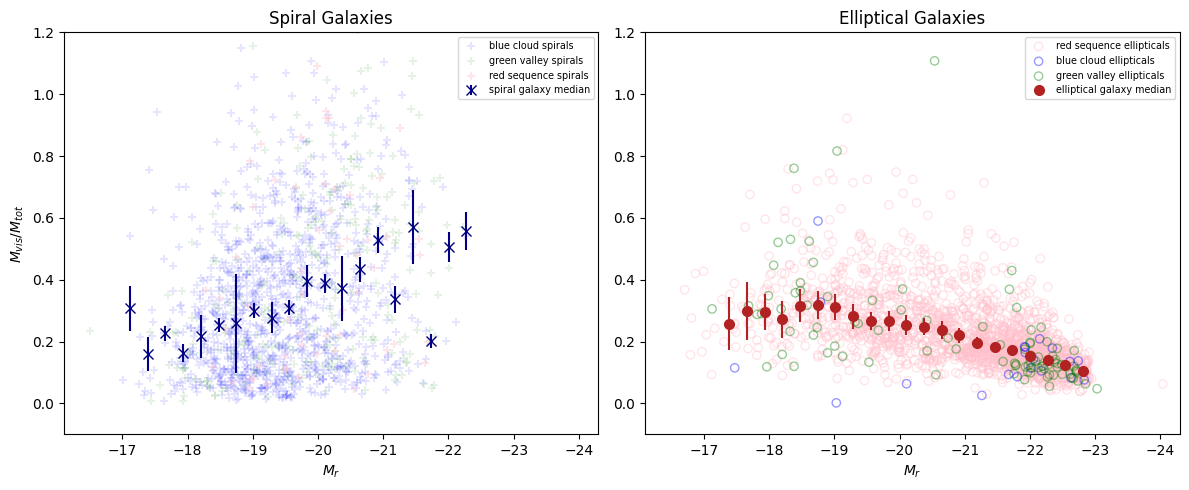

In [41]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 1], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 2], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 3], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
#fig.savefig(plot_dir + 'Mr_MvisMtot_scatter_cmd_spiral_elliptical.png')

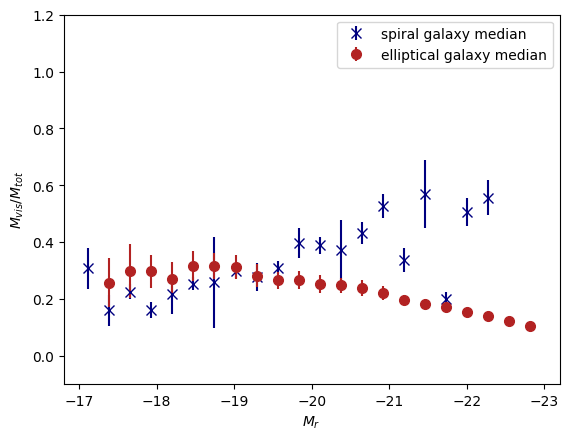

In [42]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
#plt.savefig(plot_dir + 'Mr_MvisMtot_median_morph.png')
plt.show()

## Mvis(stellar + HI within 3.5R$_{90}$)/Mtot spiral/elliptical

In [43]:
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**(spirals['Mstar_HI_3p5R90'][spirals['rabsmag'] <= mag_lim] 
                        - spirals['M'][spirals['rabsmag'] <= mag_lim]))

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**(spirals['Mstar_HI_3p5R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)]
                            - spirals['M'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)]))


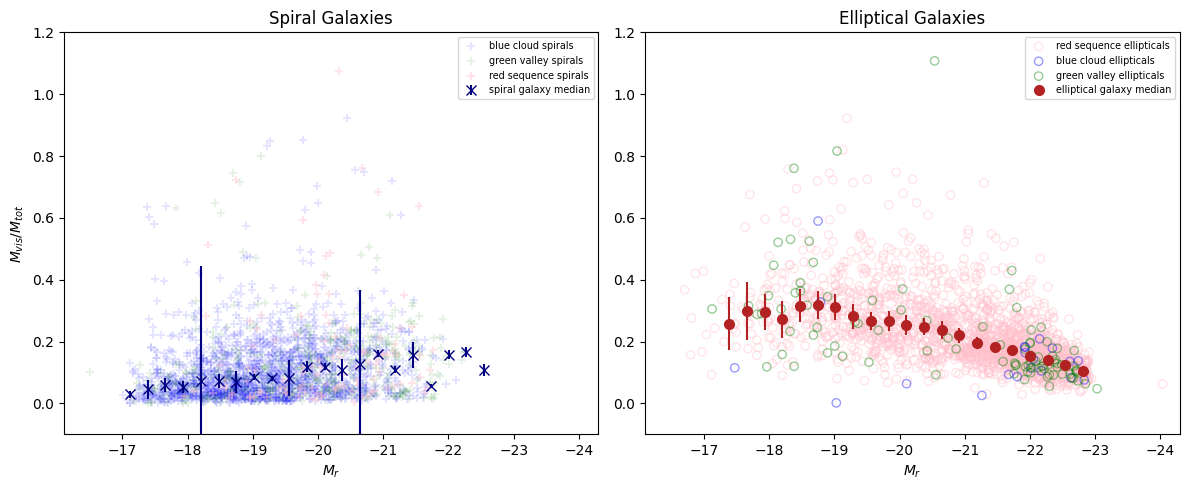

In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 1], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 1] - spirals['M'][spirals['CMD_class'] == 1]),
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 2], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 2] - spirals['M'][spirals['CMD_class'] == 2]),
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 3], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 3] - spirals['M'][spirals['CMD_class'] == 3]),
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
#fig.savefig(plot_dir + 'Mr_MstarHIMtot3p5_scatter_cmd_spiral_elliptical.png')

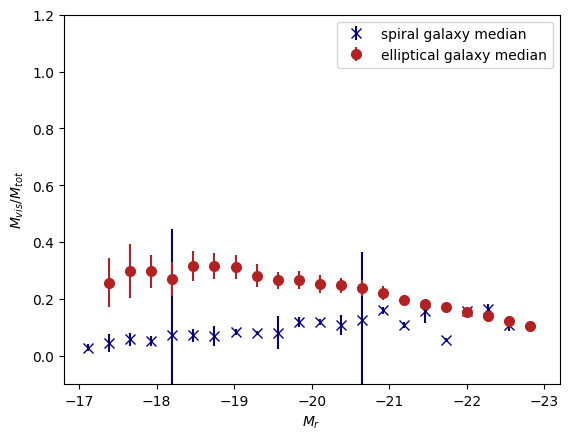

In [45]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
#plt.savefig(plot_dir + 'Mr_MstarHIMtot3p5_median_morph.png')
plt.show()

## $\sigma_{M_{DM}}$ vs. Mr ellipticals

In [46]:
mag_bins = np.linspace(np.min(ellipticals['rabsmag']),
                       np.max(ellipticals['rabsmag']),
                       30)
pts = (mag_bins[1:] + mag_bins[:-1])/2


sigma_dm = (10**ellipticals['Mvir'] - ellipticals['nsa_elpetro_mass']) / np.sqrt((10**ellipticals['Mvir_err'])**2 + (0.1*ellipticals['nsa_elpetro_mass'])**2)
sigma_dm_binned = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        sigma_dm_binned.append(sigma_dm[ellipticals['rabsmag'] <= mag_lim])
        
    else:
        lower_lim = mag_bins[i]
        sigma_dm_binned.append(sigma_dm[np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                       ellipticals['rabsmag'] > lower_lim)])
        
       

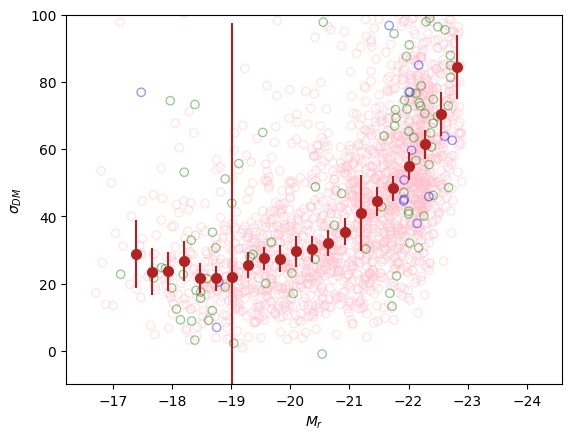

In [47]:
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], sigma_dm[ellipticals['CMD_class'] == 3],
           color='pink', fc='none', alpha=0.4, label='red sequence')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], sigma_dm[ellipticals['CMD_class'] == 2],
           color='g', fc='none', alpha=0.4, label='green valley')
plt.scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], sigma_dm[ellipticals['CMD_class'] == 1],
           color='b', fc='none', alpha=0.4, label='blue cloud')
plt.xlim(-16.2, -24.6)
plt.ylim(-10,100)

sp = med_err(sigma_dm_binned, False, False)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(pts, sp[:,0], color='firebrick', yerr=[sp[:,1] ,sp[:,2]], 
             marker='o', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-2, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$\sigma_{DM}$')
#plt.savefig(plot_dir + 'Mr_sigmaDM_scatter_cmd_ellipticals.png')
plt.show()

## Fr(Mvis > Mtot)

In [48]:
Fr_Mvis = np.ones(len(pts))*np.nan

Fr_Mvis_t = ellipticals[ellipticals['Mvir'] < ellipticals['nsa_elpetro_log_mass']]


for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        try:
            Fr_Mvis[i] = (len(Fr_Mvis_t[Fr_Mvis_t['rabsmag'] <= mag_lim]) / len(ellipticals['rabsmag'] <= mag_lim))
        except:
            continue
    else:
        lower_lim = mag_bins[i]
        try:
            Fr_Mvis[i] = (len(Fr_Mvis_t[np.logical_and(Fr_Mvis_t['rabsmag'] <= mag_lim, Fr_Mvis_t['rabsmag'] > lower_lim)])
                      / len(ellipticals[np.logical_and(ellipticals['rabsmag'] <=mag_lim, ellipticals['rabsmag'] > lower_lim)]))
        except:
            continue

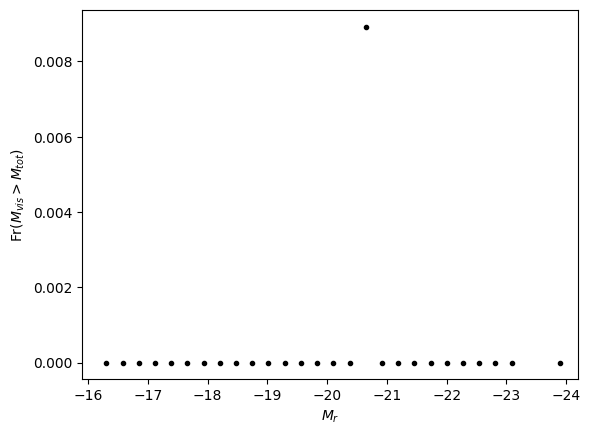

In [49]:
plt.scatter(pts, Fr_Mvis, color='k', marker='.')
plt.xlim(-15.9, -24.2)
plt.xlabel('$M_r$')
plt.ylabel('Fr$(M_{vis} > M_{tot})$')
#plt.savefig(plot_dir + 'Mr_FrMvisMtot_scatter_ellipticals.png')
plt.show()